## Lab: Exploring Time Series

#### Scenario

You are a junior data scientist at AirGo Analytics, an airline consulting firm. Your task is to analyze airline passenger traffic trends to help the company optimize its scheduling and pricing strategies. The company wants insights into passenger growth trends, seasonality, and stationarity of the data.

### Step 0: Load the Dataset
* Import the AirPassengers.csv dataset.
* Display the first 5 rows to examine the structure.

In [1]:
# CodeGrade step0

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv('AirPassengers.csv')

# Look at the data
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


### Step 1: Convert the Data to a Time Series Format
* Convert the time column to datetime format.
* Set the Month column as the index.
* Rename value to `Passengers`.
* Verify by checking a specific value, viz. the last value using '.iloc'.



In [5]:
# CodeGrade step1

# Convert to DataFrame and set index
data['Month'] = pd.to_datetime(data['time'], format='%Y') # Change the format to '%Y' to match the year-only format in the 'time' column
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
data.rename(columns={'value': 'Passengers'}, inplace=True)




Plot the time series data to visually inspect trends.

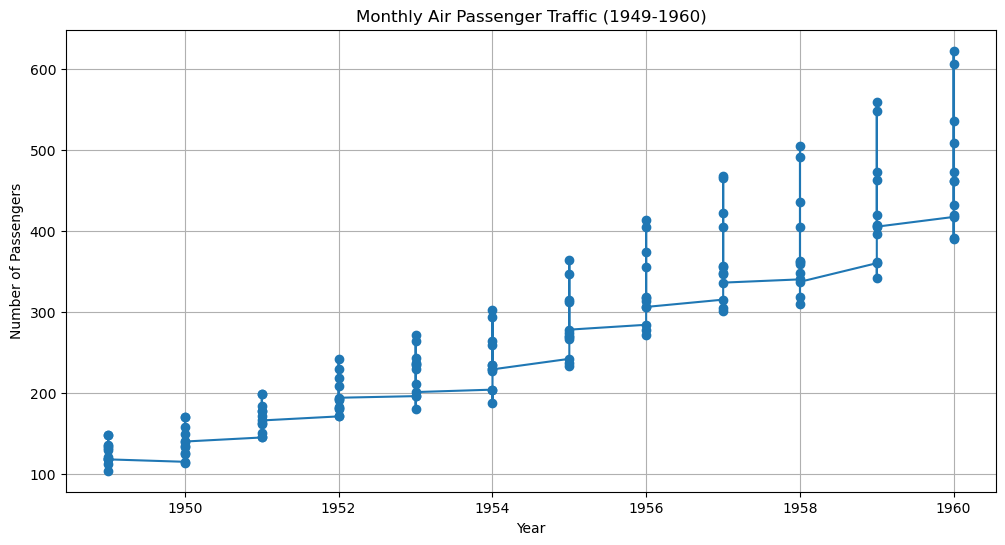

In [3]:
# Plot Time Series
plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], marker='o', linestyle='-')
plt.title("Monthly Air Passenger Traffic (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid()
plt.show()

### Step 2: Compute Rolling Statistics
* Compute the rolling mean and rolling standard deviation over 12 months.
* Display rounded values for the first non-NA value, rounding to 1 decimal plave for the rolling mean and the rolling standard deviation
 *  Output: rounded rolling mean value, roundied rolling standard deviation value

In [6]:
# CodeGrade step2

# Rolling mean and standard deviation
rolling_mean = data['Passengers'].rolling(window=12).mean()
rolling_std = data['Passengers'].rolling(window=12).std()


Plot the rolling statistics to analyze trends.

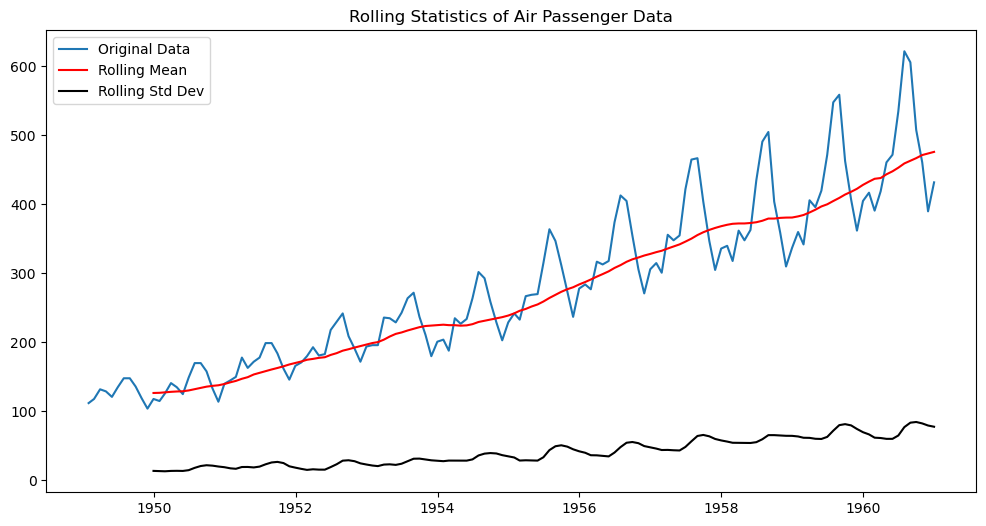

In [7]:
# Plot the Rollsing Statistics

plt.figure(figsize=(12, 6))
plt.plot(data['Passengers'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')
plt.legend()
plt.title("Rolling Statistics of Air Passenger Data")
plt.show()

### Step 3: Perform the Dickey-Fuller Test
* Compute the ADF statistic.
 * Return rounded to four decimal places.

In [ ]:
# CodeGrade step3

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

# ADF
round(result[0], 4)

### Step 4: Compute the p-value
* Check the p-value to determine stationarity.
  * Return rounded to four decimal places.

In [ ]:
# CodeGrade step4

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

# p-value
round(result[1], 4)

### Step 5: Display Critical Values
* Show the critical values for different confidence levels.
  * Return the critical values; do not round.

In [9]:
# CodeGrade step5

# Dickey-Fuller Test
result = adfuller(data['Passengers'])

#Critical Values
result[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

### Step 6: Apply Log Transformation & Differencing

* Apply log transformation to stabilize variance.
* Perform first-order differencing to remove trends.
* Return the dataset shape after transformation.

In [10]:
# CodeGrade step6

# Log Transformation
data['Log_Passengers'] = np.log(data['Passengers'])

# Differencing (first order)
data['Diff_Passengers'] = data['Log_Passengers'].diff()


Plot the differenced data.

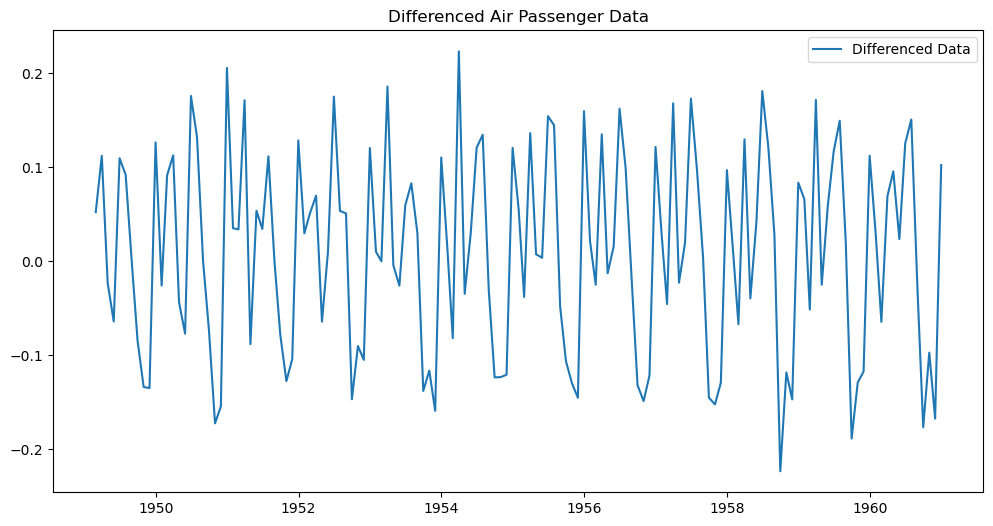

In [12]:
# Plot the differenced data

plt.figure(figsize=(12, 6))
plt.plot(data['Diff_Passengers'], label="Differenced Data")
plt.legend()
plt.title("Differenced Air Passenger Data")
plt.show()

### Step 7: Compute the ADF Statistic After Differencing
* Perform the Dickey-Fuller Test on the differenced data.
  * Return rounded to four decimal places.

In [13]:
# CodeGrade step7

# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'].dropna())

# ADF
round(result[0], 4)

-2.7171

### Step 8: Compute the p-value After Differencing
* Check whether the data is now stationary.
  * Return rounded to four decimal places.

In [14]:
# CodeGrade step8

# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'].dropna())

# p-value
round(result[1], 4)

0.0711

### Step 9: Display Critical Values After Differencing
* Check critical values for the differenced data.
  * Return the critical values; do not round.

In [15]:
# CodeGrade step9

# Dickey-Fuller Test after Differencing
result = adfuller(data['Diff_Passengers'].dropna())

# Critical values
result[4]

{'1%': -3.4825006939887997,
 '5%': -2.884397984161377,
 '10%': -2.578960197753906}